In [89]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [90]:
def calc_D(sim, planet=1):
    D =(sim.particles[planet].y - sim.particles[0].y) * sim.particles[planet].vy 
    + (sim.particles[planet].z - sim.particles[0].z) * sim.particles[planet].vz
    return D

In [91]:
def bisect(sim,t1,t2):
    tm = (t1+t2)/2.
    if t2-t1<(1.0e-13):
        return tm
    sim.integrate(tm)
    D = calc_D(sim, 1)
    if D>0.:
        t2 = tm
        return bisect(sim,t1,t2)
    else:
        t1 = tm
        return bisect(sim,t1,t2)

In [109]:
#http://www.openexoplanetcatalogue.com/planet/WASP-47%20c/
sim = rebound.Simulation()
sim.add(m=1.)
planet1_params = {"a":0.0510, "m":(0.0009543*1.16)} #w47-b
planet2_params = {"a":0.0170, "m":(0.0009543*0.038)} #w47-e
planet3_params = {"a":0.0880, "m":(0.0009543*0.03)} #w47-d
planet4_params = {"a":1.36, "m":(0.0009543*1.2), "e":0.13} #w47-c
sim.add(primary=sim.particles[0], **planet1_params)
sim.add(primary=sim.particles[0], **planet2_params)
sim.add(primary=sim.particles[0], **planet3_params)
sim.add(primary=sim.particles[0], **planet4_params)
#print sim.particles[1].xyz
#sim.move_to_com()

In [110]:
#This is code to plot D(t)
#d_array = np.zeros(100)
#for i in range(100):
#    sim.step()
#    d_array[i] = calc_D(sim, 1)
#    
#fig = plt.figure(figsize=(10,5))
#ax = plt.subplot(111)
#ax.plot(np.arange(100), d_array)
#plt.show()
#print sim.t

In [111]:
transits = 16
transits_var = 0
D_previous = 1.
time_previous = sim.t-0.01
transit_times = np.zeros(transits)
position_data = np.zeros((0,3))
while(transits_var < transits):
    sim.step()
    position_data = np.append(position_data, [sim.particles[1].xyz], axis=0)
    D = calc_D(sim, 1)
    if(D>0 and D_previous<0 and sim.particles[1].x>0):
        transit_times[transits_var] = bisect(sim, time_previous, sim.t)
        #print sim.particles[1].xyz
        sim.integrate(sim.t + 0.001)
        transits_var += 1
    time_previous = sim.t
    D_previous = D
    
#print transit_times

[[ 0.05080788  0.00442496  0.        ]
 [ 0.05063896  0.00606096  0.        ]
 [ 0.05040245  0.00778841  0.        ]
 ..., 
 [ 0.05147393  0.00439399  0.        ]
 [ 0.0515078   0.00609494  0.        ]
 [ 0.05148301  0.00786043  0.        ]]


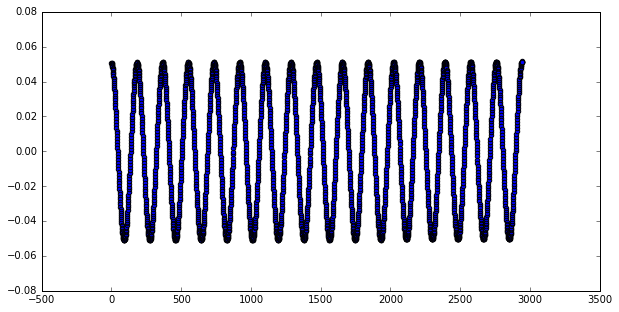

In [112]:
print position_data
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.scatter(np.arange(len(position_data[:,0])), position_data[:,0])
plt.show()
#confirming how many transits we should see based on xyz

In [113]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(transits),transit_times)

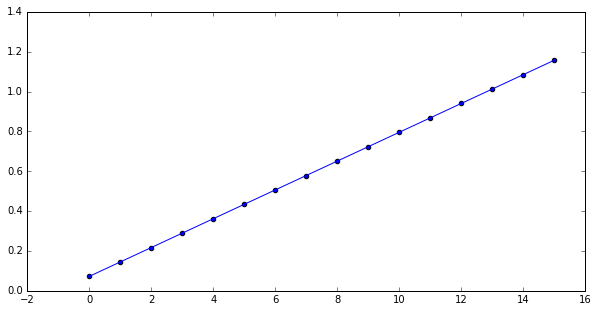

In [114]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.scatter(np.arange(transits), transit_times, marker="o")
lin = np.arange(transits)*slope + intercept
ax.plot(np.arange(transits), lin)
plt.show()

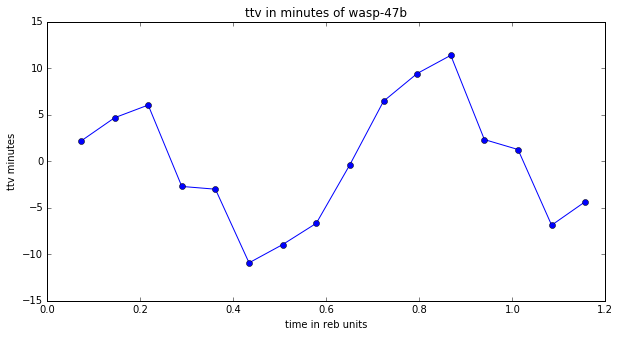

[ 0.07229858  0.14459852  0.21689881  0.28920217  0.36150296  0.43380607
  0.50610618  0.57840619  0.65070499  0.72300363  0.79530343  0.86760355
  0.93990699  1.01220802  1.08451119  1.15681113]
[ 0.07229923  0.14459994  0.21690065  0.28920135  0.36150206  0.43380276
  0.50610347  0.57840417  0.65070488  0.72300559  0.79530629  0.867607
  0.9399077   1.01220841  1.08450911  1.15680982]


In [115]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
diff = (np.arange(transits)*slope + intercept) - transit_times
diff_in_minutes = diff*2*np.pi*3.154e7*(1./60.) #multiply by 2pi, seconds in a year. Then divide by 60 for minutes.
ax.plot(transit_times, diff_in_minutes, marker="o")
ax.set_title("ttv in minutes of wasp-47b")
plt.xlabel("time in reb units")
plt.ylabel("ttv minutes")
plt.show()
print transit_times
print (np.arange(transits)*slope + intercept)

In [116]:
print sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	May 17 2017 12:41:23
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	1.1578111333703429e+00
Current timestep:    	0.000393
---------------------------------
<rebound.Particle object, m=1.0 x=0.000503378738381 y=0.00625886888658 z=0.0 vx=0.00150675491318 vy=0.00055081376554 vz=0.0>
<rebound.Particle object, m=0.001106988 x=0.0513162066508 y=0.0106831472418 z=0.0 vx=-0.383705632466 vy=4.41365888359 vz=0.0>
<rebound.Particle object, m=3.62634e-05 x=0.0106382280455 y=0.0199085095424 z=0.0 vx=-6.15561668714 vy=4.57230630272 vz=0.0>
<rebound.Particle object, m=2.8629e-05 x=0.0667550290362 y=0.0640069685996 z=0.0 vx=-2.21502915173 vy=2.54702932812 vz=0.0>
<rebound.Particle object, m=0.00114516 x=0.744056252756 y=0.991576904013 z=0.0 vx=-0.694540258786 vy=0.63181758864 vz=0.0>
---------------------------------
None
